In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import ipywidgets as widgets
import numpy as np
import pandas as pd
from IPython.display import display

data = pd.read_csv("../data/lfpr_gp_pred.csv")
data2 = pd.read_csv("../data/lfpr_gp_pred2.csv")
data['lfp_pred2'] = data2['lfp_pred']
data['lfp_se2'] = data2['lfp_se']
data['lfp_age_avg'] = data2['lfp_age_avg']
data3 = pd.read_csv("../data/lfpr_gp_pred3.csv")
data['lfp_pred3'] = data3['lfp_pred']
data['lfp_se3'] = data3['lfp_se']

In [27]:
data.head()

,year,age,sex,lfp,n,cohort,lfp_pred,lfp_se,lfp_pred2,lfp_se2,lfp_age_avg,lfp_pred3,lfp_se3
0,1976,16,1,42.835133,16430,1960,45.241432,0.507778,44.928888,0.434914,39.198872,44.143396,0.055740
1,1977,16,1,44.484486,17713,1961,44.528586,0.424491,45.884892,0.366961,39.198872,43.901651,0.049961
2,1978,16,1,45.581497,18008,1962,43.806723,0.366676,45.896631,0.348515,39.198872,43.571758,0.045757
3,1979,16,1,46.495674,17402,1963,43.083023,0.330187,44.896096,0.344938,39.198872,43.163429,0.042861
4,1980,16,1,44.297375,19704,1964,42.364676,0.309425,43.117402,0.343619,39.198872,42.688149,0.040971


In [28]:
age_widget = widgets.IntRangeSlider(
    value=[16, 80],
    min=16,
    max=80,
    step=1,
    description='Age Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
actual_data_widget = widgets.Checkbox(
    value=True,
    description='Actual LFPR',
    disabled=False
)
gp_data_widget = widgets.Checkbox(
    value=True,
    description='GP without mean function',
    disabled=False
)
gp2_data_widget = widgets.Checkbox(
    value=True,
    description='GP with age-specific mean',
    disabled=False
)
gp3_data_widget = widgets.Checkbox(
    value=True,
    description='GP with age-specific mean and logistic transform',
    disabled=False
)
data_widget_box = widgets.Box([actual_data_widget, gp_data_widget, gp2_data_widget, gp3_data_widget])
year_widget = widgets.IntRangeSlider(
    value=[1976, 2016],
    min=1976,
    max=2016,
    step=1,
    description='Year Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
cohort_label = widgets.Label('List of Cohorts (separated by commas):')
cohort_widget = widgets.Text(
    value='1930,1940,1950,1960,1970,',
    placeholder='1930,',
    description='',
    disabled=False
)
cohort_box = widgets.Box([cohort_label, cohort_widget])
age_adjustment_widget = widgets.Checkbox(
    value=False,
    description='Display age adjusted values?',
    disabled=False
)

linestyle_list = ['solid', 'dashed', 'dotted', 'dashdot']
color_list = ['b', 'g', 'r', 'c', 'm'] * 10
marker_list = ['o', '^', 'D', 'x', '+'] * 10
train_linewidth = 2
test_linewidth = 1
train_markersize = 4
test_markersize = 2
variables = ['lfp', 'lfp_pred', 'lfp_pred2', 'lfp_pred3']
vartitles = ['Actual', 'GP', 'GP w/ Mean', 'GP w/ Mean & Logistic Transform']

Box(children=(Label(value=u'List of Cohorts (separated by commas):'), Text(value=u'1930,1940,1950,1960,1970,', placeholder=u'1930,')))

IntRangeSlider(value=(16, 80), continuous_update=False, description=u'Age Range:', max=80, min=16)

IntRangeSlider(value=(1976, 2016), continuous_update=False, description=u'Year Range:', max=2016, min=1976)

Box(children=(Checkbox(value=True, description=u'Actual LFPR'), Checkbox(value=True, description=u'GP without mean function'), Checkbox(value=True, description=u'GP with age-specific mean'), Checkbox(value=True, description=u'GP with age-specific mean and logistic transform')))

Checkbox(value=False, description=u'Display age adjusted values?')

<IPython.core.display.Javascript object>


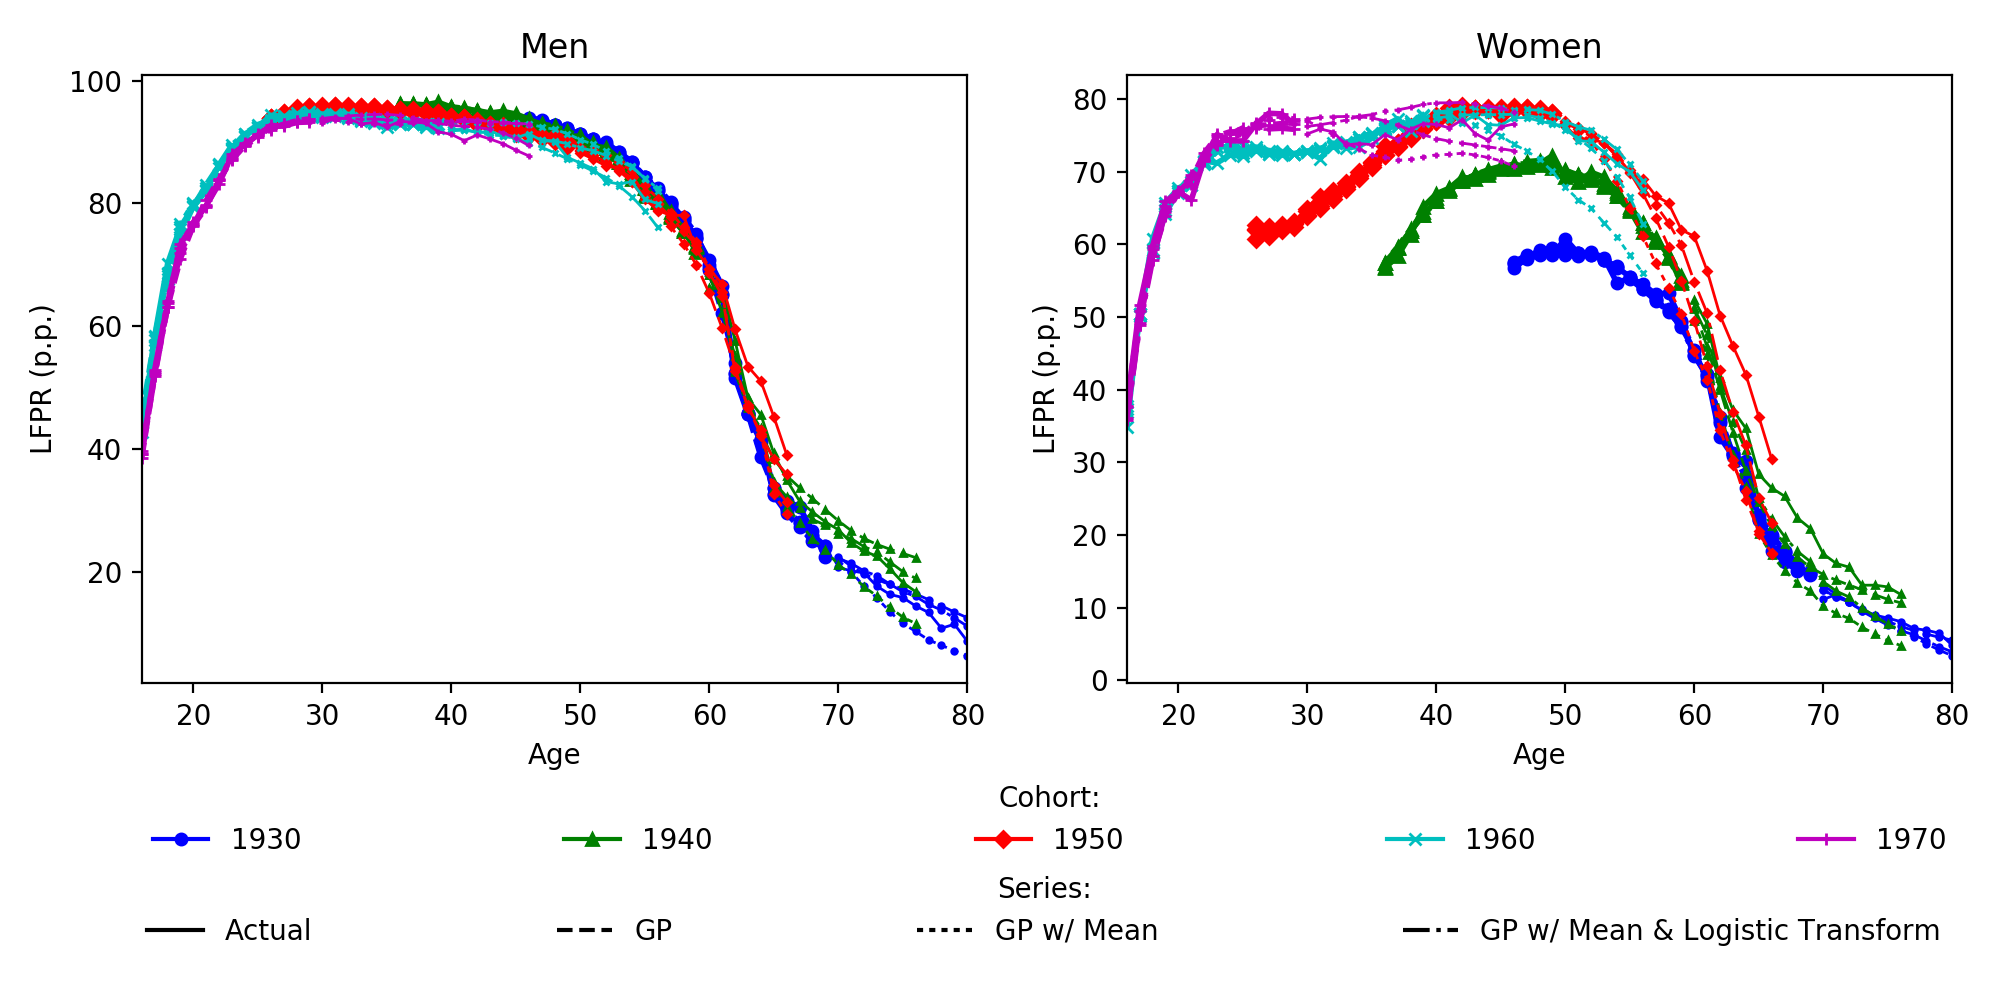

In [29]:
display(cohort_box, age_widget, year_widget, data_widget_box, age_adjustment_widget)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].set_title("Men")
ax[0].set_ylabel("LFPR (p.p.)")
ax[0].set_xlabel("Age")
ax[0].set_xlim([16, 80])
ax[0].set_ylim([0, 100])
ax[1].set_title("Women")
ax[1].set_ylabel("LFPR (p.p.)")
ax[1].set_xlabel("Age")
ax[1].set_xlim([16, 80])
ax[1].set_ylim([0, 100])
plt.tight_layout(rect = (0., 0.2, 1., 1.))
plt.show()

def cohort_plots(change):
    # Convert cohort list from text to list of ints
    cohort_list = [int(c) for c in cohort_widget.value.split(',') if c.strip().isdigit()]
    variable_values = [item.value for item in data_widget_box.children]
    
    # Create male subplot
    ax[0].clear()
    ax[0].set_title("Men")
    ax[0].set_ylabel("LFPR (p.p.)")
    ax[0].set_xlabel("Age")
    ax[0].set_xlim([age_widget.value[0], age_widget.value[1]])
    for i, cohort in enumerate(cohort_list):
        temp = data[data['cohort'] == cohort]
        temp_train = temp['year'] < 2000
        temp_test = temp['year'] >= 2000
        temp_sex = temp['sex'] == 1
        temp_ages = np.logical_and(temp['age'] >= age_widget.value[0], temp['age'] <= age_widget.value[1])
        temp_years = np.logical_and(temp['year'] >= year_widget.value[0], temp['year'] <= year_widget.value[1])
        temp_adj = np.zeros(temp['lfp'].shape)
        if age_adjustment_widget.value:
            temp_adj = temp['lfp_age_avg']
        for j, (var, val) in enumerate(zip(variables, variable_values)):
            if val:
                ax[0].plot(temp['age'][np.logical_and.reduce((temp_train, temp_sex, temp_ages, temp_years))], 
                     (temp[var][np.logical_and.reduce((temp_train, temp_sex, temp_ages, temp_years))] -
                      temp_adj[np.logical_and.reduce((temp_train, temp_sex, temp_ages, temp_years))]), 
                     color = color_list[i], marker = marker_list[i], markersize = train_markersize,
                     linestyle = linestyle_list[j], linewidth = train_linewidth)
                ax[0].plot(temp['age'][np.logical_and.reduce((temp_test, temp_sex, temp_ages, temp_years))], 
                     (temp[var][np.logical_and.reduce((temp_test, temp_sex, temp_ages, temp_years))] - 
                      temp_adj[np.logical_and.reduce((temp_test, temp_sex, temp_ages, temp_years))]), 
                     color = color_list[i], marker = marker_list[i], markersize = test_markersize,
                     linestyle = linestyle_list[j], linewidth = test_linewidth)       
    
    # Create female subplot
    ax[1].clear()
    ax[1].set_title("Women")
    ax[1].set_ylabel("LFPR (p.p.)")
    ax[1].set_xlabel("Age")
    ax[1].set_xlim([age_widget.value[0], age_widget.value[1]])
    for i, cohort in enumerate(cohort_list):
        temp = data[data['cohort'] == cohort]
        temp_train = temp['year'] < 2000
        temp_test = temp['year'] >= 2000
        temp_sex = temp['sex'] == 2
        temp_ages = np.logical_and(temp['age'] >= age_widget.value[0], temp['age'] <= age_widget.value[1])
        temp_years = np.logical_and(temp['year'] >= year_widget.value[0], temp['year'] <= year_widget.value[1])
        temp_adj = np.zeros(temp['lfp'].shape)
        if age_adjustment_widget.value:
            temp_adj = temp['lfp_age_avg']
        for j, (var, val) in enumerate(zip(variables, variable_values)):
            if val:
                ax[1].plot(temp['age'][np.logical_and.reduce((temp_train, temp_sex, temp_ages, temp_years))], 
                     (temp[var][np.logical_and.reduce((temp_train, temp_sex, temp_ages, temp_years))] -
                      temp_adj[np.logical_and.reduce((temp_train, temp_sex, temp_ages, temp_years))]), 
                     color = color_list[i], marker = marker_list[i], markersize = train_markersize,
                     linestyle = linestyle_list[j], linewidth = train_linewidth)
                ax[1].plot(temp['age'][np.logical_and.reduce((temp_test, temp_sex, temp_ages, temp_years))], 
                     (temp[var][np.logical_and.reduce((temp_test, temp_sex, temp_ages, temp_years))] - 
                      temp_adj[np.logical_and.reduce((temp_test, temp_sex, temp_ages, temp_years))]), 
                     color = color_list[i], marker = marker_list[i], markersize = test_markersize,
                     linestyle = linestyle_list[j], linewidth = test_linewidth)
    
    # Legend   
    lines = []
    for i, cohort in enumerate(cohort_list):
        lines.append(mlines.Line2D([], [], color=color_list[i], marker=marker_list[i],
                          markersize=train_markersize, label=cohort))
    ax[0].legend(handles=lines, bbox_to_anchor=(0., -0.25, 2.2, .102), 
               loc = 2, ncol=len(lines), mode='expand', borderaxespad=0., 
                 frameon=False, title="Cohort:")
        
    series = []
    for j, (var, val, title) in enumerate(zip(variables, variable_values, vartitles)):
        series.append(mlines.Line2D([], [], color='black', marker=None, label=title, linestyle = linestyle_list[j]))
    ax[1].legend(handles=series, bbox_to_anchor=(-1.2, -0.4, 2.2, .102), 
               loc = 2, ncol=len(series), mode='expand', borderaxespad=0., 
                 frameon=False, title="Series:")
        
    fig.canvas.draw()
    
for widget in [cohort_widget, age_widget, year_widget, age_adjustment_widget]:
    widget.observe(cohort_plots, names = 'value')
for widget in data_widget_box.children:
    widget.observe(cohort_plots, names = 'value')
cohort_plots(None)

In [5]:
%gui qt
from mayavi import mlab
from tvtk.api import tvtk

fig = mlab.figure(1, fgcolor=(0, 0, 0), bgcolor=(1, 1, 1))

men = data['sex'] == 1

# Create and visualize the mesh
pts = {}
for var in variables:
    pts[var] = mlab.points3d(data['age'][men], data['cohort'][men], data[var][men], data[var][men], scale_mode='none', scale_factor=0.2)

mlab.title("Men")
mlab.axes(extent = [16, 80, 1886, 2000, 0, 100], nb_labels = 6)
mlab.xlabel("Age")
mlab.ylabel("Cohort")
mlab.zlabel("LFPR (p.p.)")

mesh = {}
surf = {}
for var in variables:
    mesh[var] = mlab.pipeline.delaunay2d(pts[var])
    surf[var] = mlab.pipeline.surface(mesh[var])

fig.scene.interactor.interactor_style = tvtk.InteractorStyleTerrain()
mlab.show()